In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display

In [8]:
sns.set_style(style="whitegrid")
data_dir = Path("../data/raw")

datasets = {
    "Applications from turkey": pd.read_csv(data_dir / "asylum_applications_originating_tur.csv"),
    "Applications to turkey": pd.read_csv(data_dir / "asylum_applications_residing_tur.csv"),
    "Decisions from turkey": pd.read_csv(data_dir / "asylum_decisions_residing_tur.csv"),
    "Decisions from other countries": pd.read_csv(data_dir / "asylum_decisions_originating_tur.csv"),
}

print("Data loaded successfully")
print(f"Number of datasets loaded: {len(datasets)}" )

Data loaded successfully
Number of datasets loaded: 4


In [9]:
# Display basic information about each dataset

for name, df in datasets.items():
    print("-" * 50)
    print(f"\nDataset: {name}")
    print(f"Number of rows: {len(df)}")
    print(f"Number of columns: {len(df.columns)}")
    
    print("First few rows:")
    display(df.head())
print("-" * 50)

--------------------------------------------------

Dataset: Applications from turkey
Number of rows: 1711
Number of columns: 13
First few rows:


,Year,Country of Origin Code,Country of Asylum Code,Country of Origin Name,Country of Asylum Name,Procedure Type,Procedure Name,Application Type Code,Application Type,Application Data Type,Application Data,Application Average Persons Per Case,Number of Applications
0,#date+year,#country+code+origin,#country+code+asylum,#country+name+origin,#country+name+asylum,#indicator+procedure_type,#indicator+procedure+name,#indicator+application_type+code,#indicator+application_type,#indicator+application_data_type,#indicator+application_data,#indicator+application_average_persons+num,#inneed+asylum_seekers+applications
1,2000,TUR,ALB,Türkiye,Albania,G,Government,V,Various,C,Cases,0,34
2,2000,TUR,AUS,Türkiye,Australia,G,Government,V,Various,C,Cases,0,75
3,2000,TUR,AUS,Türkiye,Australia,G,Government,V,Various,C,Cases,0,111
4,2000,TUR,AUT,Türkiye,Austria,G,Government,V,Various,P,Persons,0,592


--------------------------------------------------

Dataset: Applications to turkey
Number of rows: 935
Number of columns: 13
First few rows:


,Year,Country of Origin Code,Country of Asylum Code,Country of Origin Name,Country of Asylum Name,Procedure Type,Procedure Name,Application Type Code,Application Type,Application Data Type,Application Data,Application Average Persons Per Case,Number of Applications
0,#date+year,#country+code+origin,#country+code+asylum,#country+name+origin,#country+name+asylum,#indicator+procedure_type,#indicator+procedure+name,#indicator+application_type+code,#indicator+application_type,#indicator+application_data_type,#indicator+application_data,#indicator+application_average_persons+num,#inneed+asylum_seekers+applications
1,2000,AFG,TUR,Afghanistan,Türkiye,U,UNHCR,V,Various,P,Persons,0,81
2,2000,DZA,TUR,Algeria,Türkiye,U,UNHCR,V,Various,P,Persons,0,5
3,2000,CHN,TUR,China,Türkiye,U,UNHCR,V,Various,P,Persons,0,11
4,2000,COG,TUR,Congo,Türkiye,U,UNHCR,V,Various,P,Persons,0,5


--------------------------------------------------

Dataset: Decisions from turkey
Number of rows: 902
Number of columns: 16
First few rows:


,Year,Country of Origin Code,Country of Asylum Code,Country of Origin Name,Country of Asylum Name,Procedure Type,Procedure Name,Decision Type Code,Decision Data Type,Decision Data,Decisions Average Persons Per Case,Recognized,Complementary Protection,Otherwise Closed,Rejected,Total Decided
0,#date+year,#country+code+origin,#country+code+asylum,#country+name+origin,#country+name+asylum,#indicator+procedure_type,#indicator+procedure+name,#indicator+decision_type+code,#indicator+decision_data_type,#indicator+decision_data,#indicator+decision_average_persons+num,#inneed+asylum_seekers+recognized,#inneed+asylum_seekers+recognized_other,#inneed+asylum_seekers+otherwise_closed,#inneed+asylum_seekers+rejected,#inneed+asylum_seekers+total_decided
1,2000,AFG,TUR,Afghanistan,Türkiye,U,UNHCR,FI,P,Persons,0,29,0,49,24,102
2,2000,DZA,TUR,Algeria,Türkiye,U,UNHCR,FI,P,Persons,0,0,0,5,0,5
3,2000,CHN,TUR,China,Türkiye,U,UNHCR,FI,P,Persons,0,14,0,0,0,14
4,2000,ERI,TUR,Eritrea,Türkiye,U,UNHCR,FI,P,Persons,0,0,0,0,14,14


--------------------------------------------------

Dataset: Decisions from other countries
Number of rows: 1616
Number of columns: 16
First few rows:


,Year,Country of Origin Code,Country of Asylum Code,Country of Origin Name,Country of Asylum Name,Procedure Type,Procedure Name,Decision Type Code,Decision Data Type,Decision Data,Decisions Average Persons Per Case,Recognized,Complementary Protection,Otherwise Closed,Rejected,Total Decided
0,#date+year,#country+code+origin,#country+code+asylum,#country+name+origin,#country+name+asylum,#indicator+procedure_type,#indicator+procedure+name,#indicator+decision_type+code,#indicator+decision_data_type,#indicator+decision_data,#indicator+decision_average_persons+num,#inneed+asylum_seekers+recognized,#inneed+asylum_seekers+recognized_other,#inneed+asylum_seekers+otherwise_closed,#inneed+asylum_seekers+rejected,#inneed+asylum_seekers+total_decided
1,2000,TUR,ALB,Türkiye,Albania,G,Government,FI,C,Cases,0,10,0,30,0,40
2,2000,TUR,AUS,Türkiye,Australia,G,Government,AR,C,Cases,0,17,0,5,56,78
3,2000,TUR,AUS,Türkiye,Australia,G,Government,FI,C,Cases,0,38,0,5,99,142
4,2000,TUR,AUT,Türkiye,Austria,G,Government,FA,P,Persons,0,18,0,157,165,340


--------------------------------------------------


In [10]:
# Data quality checks

def check_data_quality(name, df):
    print(f"\nDataset: {name}")
    print(f"Total duplicated rows: {df.duplicated().sum()}")
    print(f"Duplicate percentage: {(df.duplicated().sum() / len(df) * 100):.2f}%")
    
    print("\nColumn summary:")
    summary_columns = pd.DataFrame({
        "Type": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Missing %": (df.isnull().mean() * 100).round(2)
    })
    display(summary_columns)

for name, df in datasets.items():
    check_data_quality(name, df)


Dataset: Applications from turkey
Total duplicated rows: 5
Duplicate percentage: 0.29%

Column summary:


,Type,Missing Values,Missing %
Year,object,0,0.00
Country of Origin Code,object,0,0.00
Country of Asylum Code,object,0,0.00
Country of Origin Name,object,0,0.00
Country of Asylum Name,object,0,0.00
Procedure Type,object,0,0.00
Procedure Name,object,0,0.00
Application Type Code,object,4,0.23
Application Type,object,0,0.00
Application Data Type,object,0,0.00



Dataset: Applications to turkey
Total duplicated rows: 1
Duplicate percentage: 0.11%

Column summary:


,Type,Missing Values,Missing %
Year,object,0,0.0
Country of Origin Code,object,0,0.0
Country of Asylum Code,object,0,0.0
Country of Origin Name,object,0,0.0
Country of Asylum Name,object,0,0.0
Procedure Type,object,0,0.0
Procedure Name,object,0,0.0
Application Type Code,object,0,0.0
Application Type,object,0,0.0
Application Data Type,object,0,0.0



Dataset: Decisions from turkey
Total duplicated rows: 0
Duplicate percentage: 0.00%

Column summary:


,Type,Missing Values,Missing %
Year,object,0,0.0
Country of Origin Code,object,0,0.0
Country of Asylum Code,object,0,0.0
Country of Origin Name,object,0,0.0
Country of Asylum Name,object,0,0.0
Procedure Type,object,0,0.0
Procedure Name,object,0,0.0
Decision Type Code,object,0,0.0
Decision Data Type,object,0,0.0
Decision Data,object,0,0.0



Dataset: Decisions from other countries
Total duplicated rows: 0
Duplicate percentage: 0.00%

Column summary:


,Type,Missing Values,Missing %
Year,object,0,0.0
Country of Origin Code,object,0,0.0
Country of Asylum Code,object,0,0.0
Country of Origin Name,object,0,0.0
Country of Asylum Name,object,0,0.0
Procedure Type,object,0,0.0
Procedure Name,object,0,0.0
Decision Type Code,object,21,1.3
Decision Data Type,object,0,0.0
Decision Data,object,0,0.0


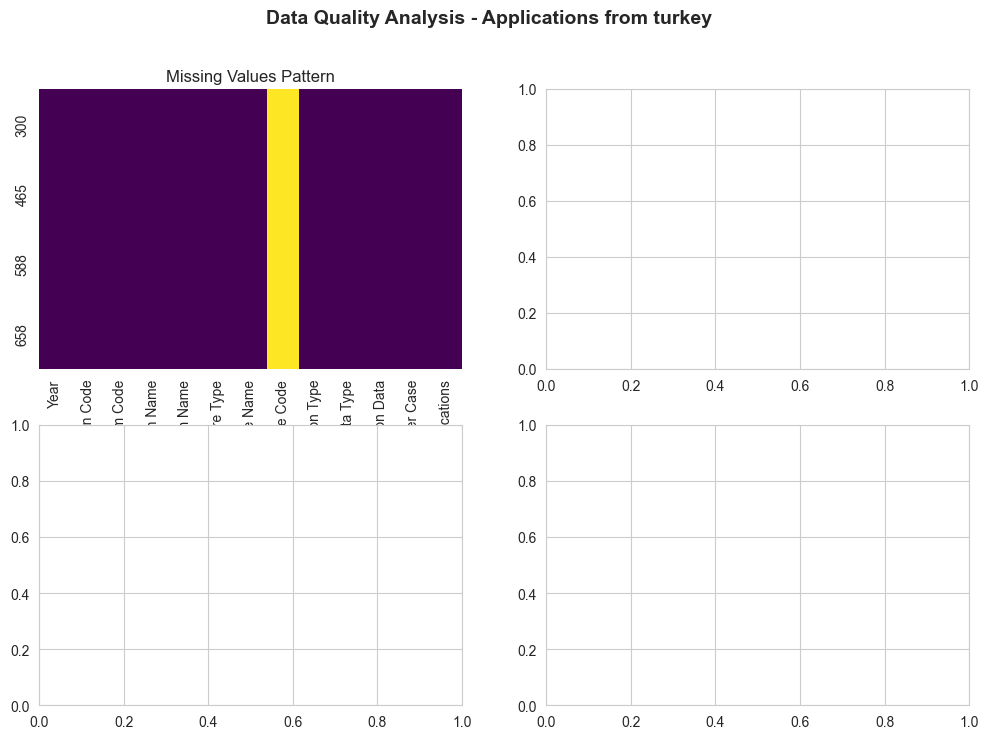

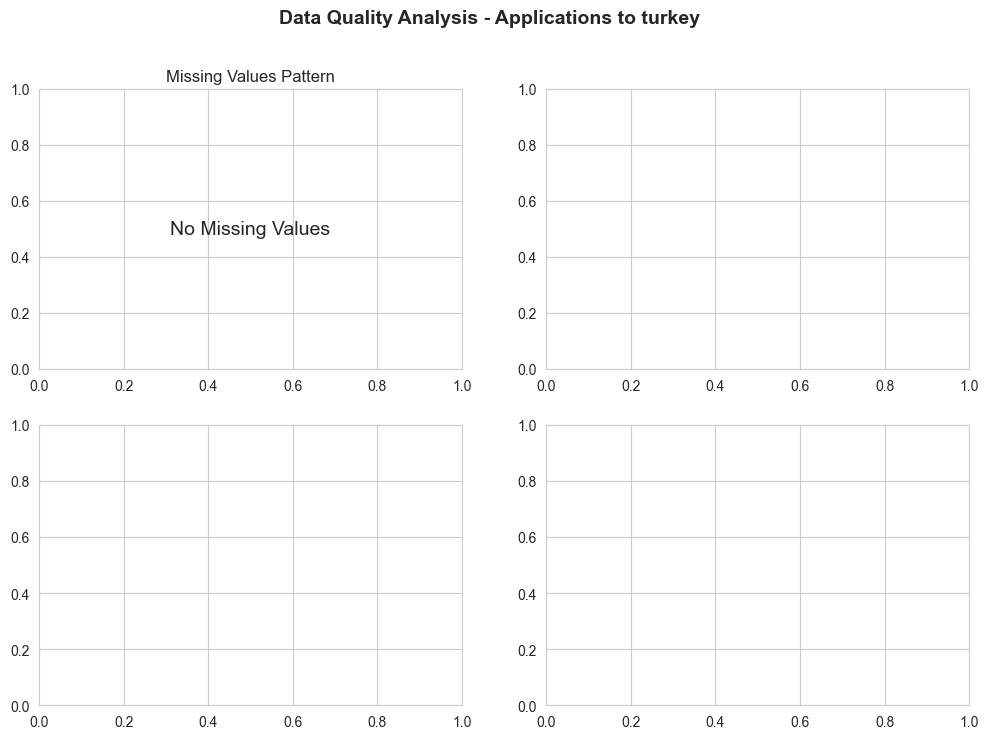

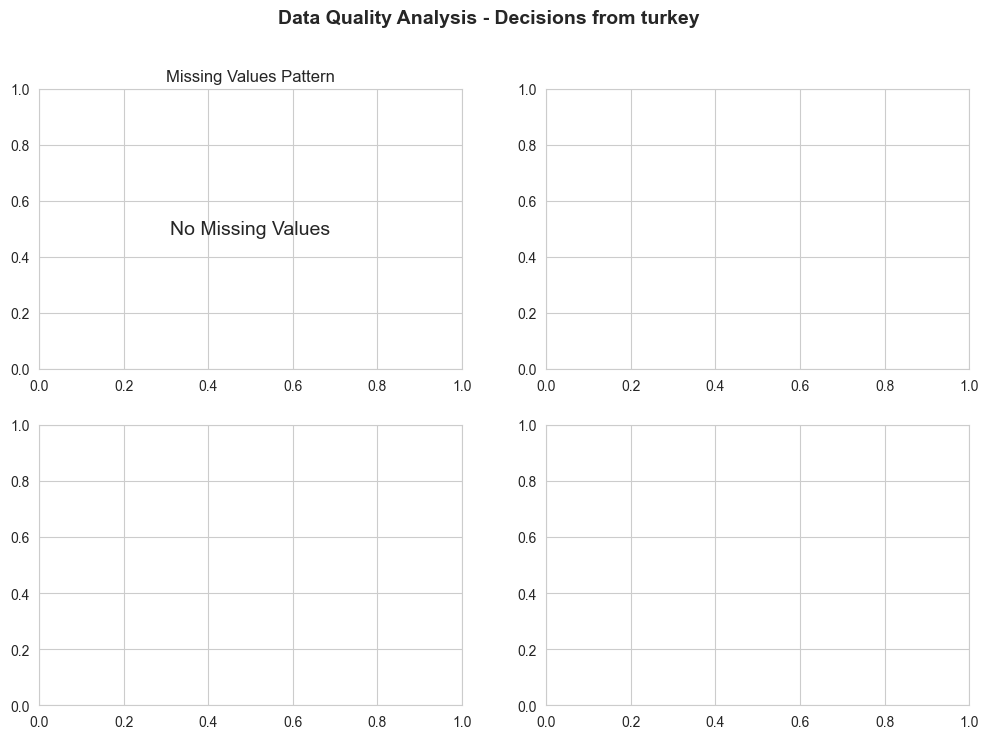

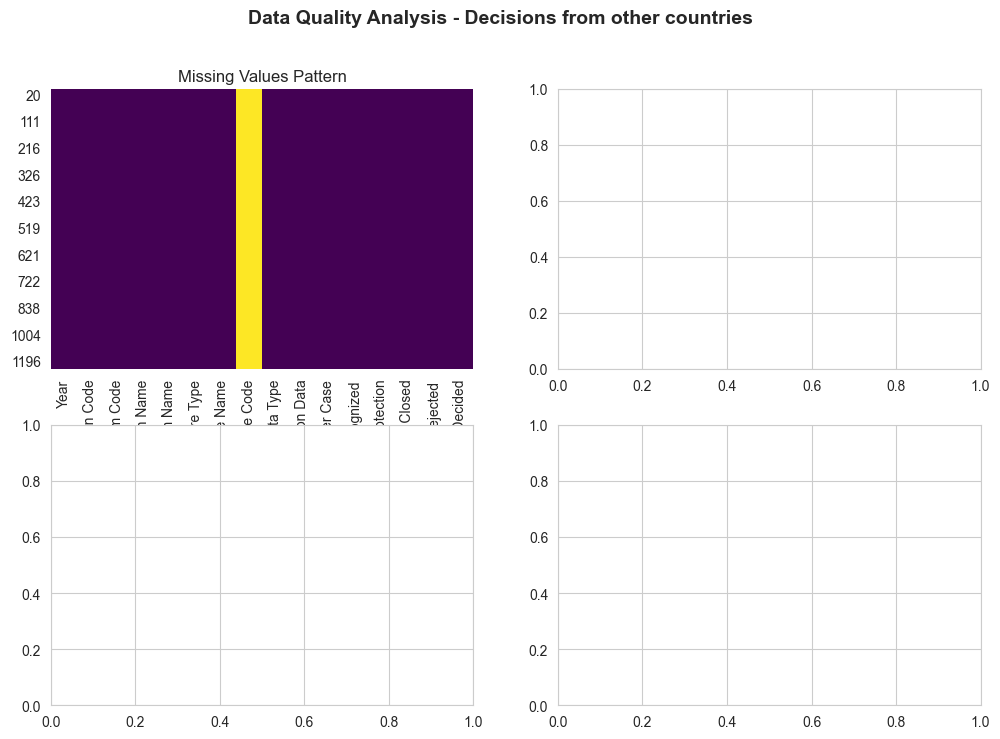

In [15]:
# Data Quality Visualizations

def data_quality_plots(name, df, figsize=(12, 8)):
    fig, axs = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle(f"Data Quality Analysis - {name}", fontsize=14, fontweight="bold")
    if df.isnull().sum().sum() > 0:
        # sns.heatmap(df.isnull(), cbar=True, ax=axs[0,0], cmap="viridis")
        # missing_row = df.isnull().any().index
        # df_missing_only = df[missing_row]
        missing_row_indices = df[df.isnull().any(axis=1)].index
        sns.heatmap(df.loc[missing_row_indices].isnull(), cbar=False, ax=axs[0,0], cmap='viridis')
        # axs[0,0].ylabel('Row Index')
        # axs[0,0].xticks(rotation=45, ha='right')
    else:
        axs[0,0].text(0.5, 0.5, "No Missing Values", ha="center", va="center", fontsize=14)
    axs[0,0].set_title("Missing Values Pattern")
    

for name, df in datasets.items():
    data_quality_plots(name, df)